# Automatic Differentiation

In [4]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad = True)
b = torch.randn(3, requires_grad = True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

## Tensors, Functions and Computational graph

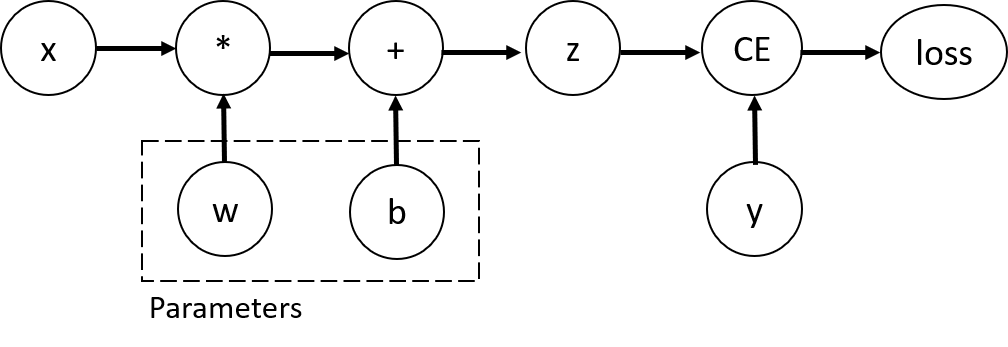

In [5]:
print('Gradient function for z =',z.grad_fn)
print('Gradient function for loss =', loss.grad_fn)

Gradient function for z = <AddBackward0 object at 0x000001FBCDCD4AC0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward object at 0x000001FBCDCD4A90>


## Computing Gradients

In [6]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2670, 0.1597, 0.0351],
        [0.2670, 0.1597, 0.0351],
        [0.2670, 0.1597, 0.0351],
        [0.2670, 0.1597, 0.0351],
        [0.2670, 0.1597, 0.0351]])
tensor([0.2670, 0.1597, 0.0351])


## Disabling Gradient Tracking

In [8]:
z = torch.matmul(x, w) + b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w) + b
print(z.requires_grad)

True
False


In [9]:
z = torch.matmul(x, w) + b
z_det = z.detach()
print(z_det.requires_grad)

False


There are reasons you might want to disable gradient tracking: <br>
- To mark some parameters in your neural network at frozen parameters. This is a very common scenario for finetuning a pretrained network <br>
- To speed up computations when you are only doing forward pass, because computations on tensors that do not track gradients would be more efficient.